In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the training set
df = pd.read_csv(r'.\gamified_dataset/Dyt-desktop.csv')

print("#-----> First 5 rows of the training set:\n")
df.head(5)


#-----> First 5 rows of the training set:



,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,...,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,No,Yes,7,10,10,0,10,1.0,0.0,...,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,No
1,Female,Yes,Yes,13,12,12,0,12,1.0,0.0,...,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,Yes
2,Female,No,Yes,7,6,6,0,6,1.0,0.0,...,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,No
3,Female,No,Yes,7,0,0,0,0,0.0,0.0,...,0,0.000000,0.00,1,0,0,0,0.000000,0.000000,No
4,Female,No,Yes,8,4,4,0,4,1.0,0.0,...,1,25.000000,0.05,26,2,2,2,0.076923,0.076923,No


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [5]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Otherlang'] = label_encoder.fit_transform(df['Otherlang'])
df['Nativelang'] = label_encoder.fit_transform(df['Nativelang'])
df['Dyslexia'] = label_encoder.fit_transform(df['Dyslexia'])

In [6]:
X_features = df.drop(['Dyslexia'], axis=1)
y_labels= df['Dyslexia']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

# Standardize the input features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from sklearn.metrics import recall_score,classification_report

# Calculate class weights
class_weights = {0: 1, 1: 2}  # Adjust the weight for dyslexia class (1) according to your preference

model = LogisticRegression(class_weight=class_weights)

# Train the model
model.fit(X_train, y_train)

# Cross-validate the model with different decision thresholds
thresholds = np.arange(0.2, 0.3, 0.005)
for threshold in thresholds:
    # Predict probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Apply threshold to get binary predictions
    y_pred = (y_pred_prob > threshold).astype(int)
    
    # Evaluate recall on the test set with the current threshold
    recall = recall_score(y_test, y_pred)
    
    # Print the current threshold and recall
    print(f"Threshold: {threshold:.3f}, Recall: {recall:.4f}")
    classification_rep_test = classification_report(y_test, y_pred)
    print(classification_rep_test)


C:\Users\Haneen\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Threshold: 0.200, Recall: 0.7436
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       651
           1       0.33      0.74      0.46        78

    accuracy                           0.81       729
   macro avg       0.65      0.78      0.67       729
weighted avg       0.90      0.81      0.84       729

Threshold: 0.205, Recall: 0.7436
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       651
           1       0.34      0.74      0.46        78

    accuracy                           0.81       729
   macro avg       0.65      0.78      0.68       729
weighted avg       0.90      0.81      0.84       729

Threshold: 0.210, Recall: 0.7436
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       651
           1       0.34      0.74      0.47        78

    accuracy                           0.82       729
   macro avg       0.65      

In [11]:
import pickle

# Select the final threshold and retrain the model if needed
threshold = 0.275
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate recall on the test set with the current threshold
recall = recall_score(y_test, y_pred)

# Print the current threshold and recall
print(f"Threshold: {threshold:.3f}, Recall: {recall:.4f}")
classification_rep_test = classification_report(y_test, y_pred)
print(classification_rep_test)


Threshold: 0.275, Recall: 0.7051
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       651
           1       0.38      0.71      0.50        78

    accuracy                           0.85       729
   macro avg       0.67      0.78      0.70       729
weighted avg       0.90      0.85      0.87       729



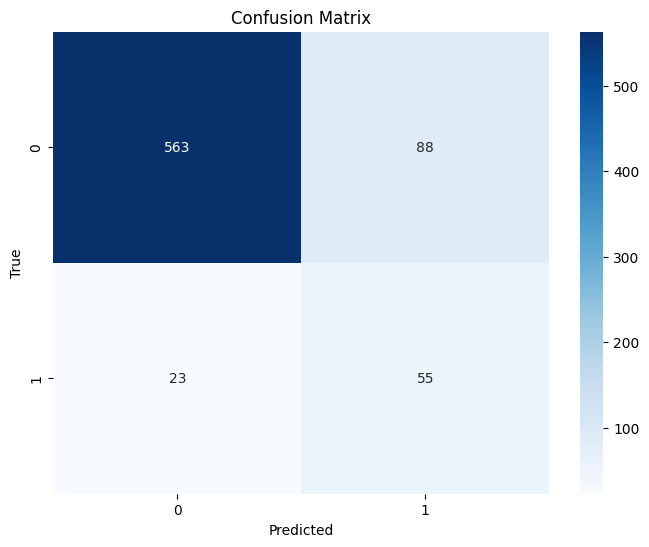

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Haneen\\AppData\\Roaming\\Python\\Python310\\site-packages\\~umpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 376.9/376.9 MB 857.0 kB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 1.1 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 3.0/3.0 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 26.4/26.4 MB 836.9 kB/s eta 0:00:00
     -------------------------------------- 127.8/127.8 kB 1.3 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 413.4/413.4 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 1.2 MB/s eta 0:00:00
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
     ---------------------------------------- 4.1/4.1 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 697.2 kB/s eta 0:00:00

In [13]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
X_features = scaler.fit_transform(X_features)

In [10]:
class_weights = {0: 1, 1: 2}

model = LogisticRegression(class_weight=class_weights)

# Train the model on the full dataset
model.fit(X_features, y_labels)


C:\Users\Haneen\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 2})

In [13]:
import pickle

# Save the model to a .sav file
filename = 'lr_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

pickle.dump(scaler, open("scaler.sav", "wb"))